In [1]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
model = BayesianNetwork([('age','trestbps'), ('age','fbs'), ('sex','trestbps'), ('exang','trestbps'), ('trestbps','target'), ('fbs','target'), ('target','restecg'), ('target','thalach'), ('target','chol')])
model.fit(heart, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)
for i in model.get_cpds():
    print(i)

+---------+------------+
| age(29) | 0.00330033 |
+---------+------------+
| age(34) | 0.00660066 |
+---------+------------+
| age(35) | 0.0132013  |
+---------+------------+
| age(37) | 0.00660066 |
+---------+------------+
| age(38) | 0.00990099 |
+---------+------------+
| age(39) | 0.0132013  |
+---------+------------+
| age(40) | 0.00990099 |
+---------+------------+
| age(41) | 0.0330033  |
+---------+------------+
| age(42) | 0.0264026  |
+---------+------------+
| age(43) | 0.0264026  |
+---------+------------+
| age(44) | 0.0363036  |
+---------+------------+
| age(45) | 0.0264026  |
+---------+------------+
| age(46) | 0.0231023  |
+---------+------------+
| age(47) | 0.0165017  |
+---------+------------+
| age(48) | 0.0231023  |
+---------+------------+
| age(49) | 0.0165017  |
+---------+------------+
| age(50) | 0.0231023  |
+---------+------------+
| age(51) | 0.039604   |
+---------+------------+
| age(52) | 0.0429043  |
+---------+------------+
| age(53) | 0.0264026  |


In [4]:
q = infer.query(variables=['target'], evidence={'trestbps':160})
print(q)

Eliminating: exang: 100%|██████████| 4/4 [00:00<00:00, 571.22it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5076 |
+-----------+---------------+
| target(1) |        0.4924 |
+-----------+---------------+


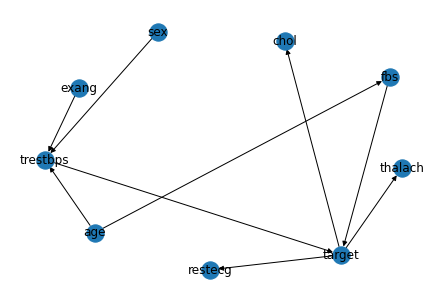

In [5]:
import networkx as nx
nx.draw(model, with_labels=True)